<a href="https://colab.research.google.com/github/alouwyck/vives_ttk_tallinn/blob/main/hydro/Intro_Hydrogeology_Exercises_with_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

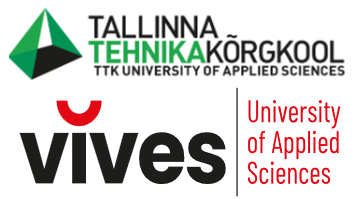<br>

**Erasmus+ Teaching Exchange**<br>
**TTK University of Applied Sciences, Tallinn, Estonia**<br>
8 - 12 December 2025<br><br>
**Guest Lecture at Centre for Sciences**<br>
by Andy Louwyck<br>
VIVES University of Applied Sciences, Kortrijk, Belgium

---



---



# **INTRODUCTION TO HYDROGEOLOGY: EXERCISES**

## Exercise 1

Consider an aquifer with a hydraulic conductivity $K$ of 100 m/d. Two observation wells are installed in the aquifer; distance $L$ between the two wells is 50 m. The hydraulic head $h$ in the first well is 10 m, and in the second well it is 20 m.

In which direction does groundwater flow — from well 1 to well 2, or from well 2 to well 1? And what is the flow rate?

In [24]:
K = 100
L = 50
h1 = 10
h2 = 20

# apply darcy's law
q = -K * (h2 - h1) / L
print('the flow rate is', q, 'm/d from well 2 to well 1')

the flow rate is -20.0 m/d from well 2 to well 1


## Exercise 2

Consider an aquitard with an observation well equipped with separate screens at the top and bottom of the aquitard. Groundwater flow in an aquitard is generally vertical; in this case, the vertical flow rate is 0.1 m/d. The hydraulic head at the top is 112 m, while at the bottom it is 109 m. The aquitard is 7 m thick. What is its vertical hydraulic conductivity?

In [9]:
D = 7
htop = 112
hbot = 109
q = 0.1

# rearrange darcy's law
K = q * D / (htop - hbot)
print('the vertical conductivity is', round(K, 3), 'm/d')

the vertical conductivity is 0.233 m/d


## Exercise 3

A pumping well in a confined aquifer withdraws water at a rate $Q$ of 250 m³/d and has a radius of influence $R$ of 1 km. The aquifer has a thickness $D$ of 5 m and a hydraulic conductivity $K$ of 20 m/d. What is the drawdown $s$ in an observation well at a distance $r$ of 15 m from the pumping well?

In [11]:
from math import pi, log

Q = 250
R = 1000
D = 5
K = 20
T = K*D
r = 15

# apply thiem's formula
s = Q/2/pi/T * log(R/r)
print('drawdown s in the observation well is', round(s, 2), 'm')

drawdown s in the observation well is 1.67 m


## Exercise 4

Consider an unconfined aquifer with a hydraulic conductivity of 6 m/d. A pumping well withdraws water at a rate of 1000 m³/d. The cone of depression extends to a radius of 400 m, and the initial water table elevation is 50 m. Calculate the drawdown in the pumping well, which has a diameter of 0.1 m.

In [14]:
from math import pi, sqrt, log

K = 6
Q = 1000
R = 400
h0 = 50
r = 0.1 / 2

# apply dupuit's formula
s = h0 - sqrt(h0**2 - Q / pi / K * log(R / r))
print('drawdown s in the pumping well is', round(s, 2), 'm')

drawdown s in the pumping well is 5.02 m


## Exercise 5

A pumping well with a diameter of 0.05 m is pumping groundwater at 3500 m³/d from a confined aquifer that is 85 m thick, with a cone of depression extending 600 m from the well. The drawdown in the well is 20 m. What is the hydraulic conductivity of the aquifer?

In [18]:
from math import pi, log

r = 0.05 / 2
Q = 3500
D = 85
R = 600
s = 20

# rearranging thiem's formula
K = Q/2/pi/D/s * log(R/r)
print('the aquifer conductivity is', round(K, 2), 'm/d')

the aquifer conductivity is 3.3 m/d


## Exercise 6

A pumping well is pumping groundwater at 420 m³/d from an unconfined aquifer with conductivity equal to 31 m/d. The drawdown in an observation well at 8 m from the pumping well is 0.5 m. The initial height of the water table was 23 m. What is the extent of the cone of depression?

In [22]:
from math import pi, exp
Q = 420
K = 31
r = 8
s = 0.5
h0 = 23

# rearranging dupuit's formula
R = r * exp((h0**2 - (h0 - s)**2) * pi*K/Q)
print('the radius of influence is', round(R), 'm')

the radius of influence is 1564 m


In [23]:
# test solution
h0 - sqrt(h0**2 - Q / pi / K * log(R / r))

0.5

## Exercise 7

Consider an aquifer with hydraulic conductivity equal to 0.55 m/d. The pumping rate of a well with diameter of 0.2 m extracting from the aquifer is 145 m³/d. The initial head in the aquifer is 31 m. The cone of depression extends 412 m from the pumping well.

Plot the distance-drawdown graph using both Thiem's and Dupuit's formula.

In [41]:
import numpy as np

K = 0.55
Q = 145
h0 = 31
R = 412
rw = 0.2/2

# radial distances
r = np.logspace(np.log10(rw), np.log10(R), 100)

# drawdown s according to the Thiem formula:
s1 = Q / 2 / np.pi / K / h0 * np.log(R / r)

# drawdown s according to the Dupuit formula:
s2 = h0 - np.sqrt(h0**2 - Q / np.pi / K * np.log(R / r))

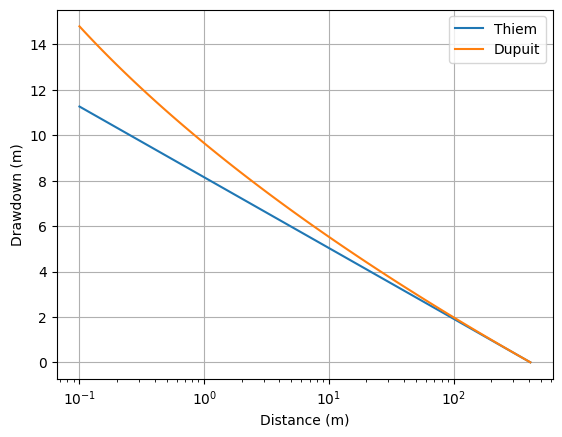

In [42]:
import matplotlib.pyplot as plt

plt.semilogx(r, s1, label='Thiem')
plt.semilogx(r, s2, label='Dupuit')
plt.xlabel('Distance (m)')
plt.ylabel('Drawdown (m)')
plt.legend()
plt.grid()

## Exercise 8

Consider an unconfined aquifer with hydraulic conductivity equal to 1.46 m/d. The pumping rate of a well with diameter of 0.065 m extracting from the aquifer is 367 m³/d. The initial head in the aquifer is 26 m. The cone of depression extends 556 m from the pumping well.

Plot the distance-drawdown graph. What do you see? Can you explain what is happening in this case?

In [47]:
import numpy as np

K = 1.46
rw = 0.065/2
Q = 367
h0 = 26
R = 556

# radial distances
r = np.logspace(np.log10(rw), np.log10(R), 100)

# unconfined -> apply the Dupuit formula:
s = h0 - np.sqrt(h0**2 - Q / np.pi / K * np.log(R / r))

# RuntimeWarning occurs because sqrt() receives a negative argument for distances near the well.
# Physically, this means the pumping well has gone dry!

/tmp/ipython-input-812208206.py:11: RuntimeWarning: invalid value encountered in sqrt
  s = h0 - np.sqrt(h0**2 - Q / np.pi / K * np.log(R / r))


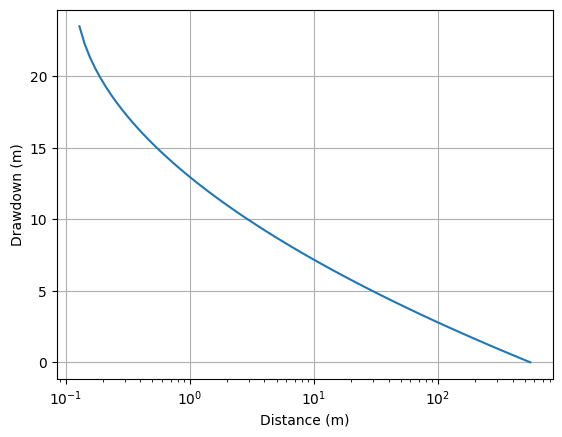

In [48]:
import matplotlib.pyplot as plt

plt.semilogx(r, s)
plt.xlabel('Distance (m)')
plt.ylabel('Drawdown (m)')
plt.grid()

## Exercise 9

Consider a pumping well extracting water from a confined aquifer at a rate of 100 m³/d. The aquifer is 10 m thick. Drawdown is measured in observations wells at different distances from the pumping well:

- at 1 m, drawdown is 2.00 m
- at 2 m, drawdown is 1.75 m
- at 5 m, drawdown is 1.50 m
- at 10 m, drawdown is 1.25 m

Make a semi-logarithmic plot of these data and apply linear regression using NumPy function `polyfit`. Plot the regression line and determine the conductivity of the aquifer from the slope of the line.

In [80]:
import numpy as np

r = np.array([1, 2, 5, 10])
s = np.array([2, 1.75, 1.5, 1.25])

In [81]:
# linear regression
coef = np.polyfit(np.log(r), s, deg=1)
slope, intercept = tuple(coef)
sfit = slope * np.log(r) + intercept

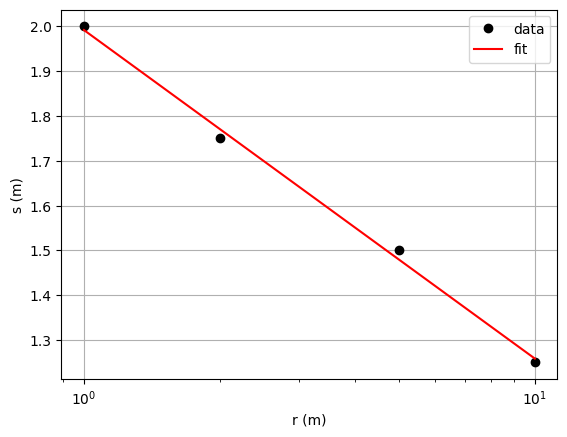

In [86]:
plt.semilogx(r, s, 'ko', label='data')
plt.semilogx(r, sfit, 'r-', label='fit')
plt.xlabel('r (m)')
plt.ylabel('s (m)')
plt.legend()
plt.grid()

In [83]:
# estimate conductivity
Q = 100
D = 10
K = Q / 2 / np.pi / D / -slope
print('the aquifer conductivity is', round(K, 2), 'm/d')

the aquifer conductivity is 5.0 m/d


## Exercise 10

Consider a confined aquifer that is 100 m thick with a hydraulic conductivity of 2.5 m/d. A pumping well withdraws 500 m³/d. An injection well, located 100 m east of the pumping well, re-injects water at the same rate. Both wells have a diameter of 0.20 m. Prior to pumping, the aquifer exhibits a uniform regional flow from south to north with a hydraulic gradient of 0.02.

Create a contour map of hydraulic head and overlay particle pathlines. Use a 400 m x 400 m plotting window centered on the midpoint between the two wells so that both wells are clearly visible.

In [84]:
!pip install timml -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 4.8 MB/s eta 0:00:00


In [85]:
import timml

In [123]:
D = 100
K = 2.5
Q = 500
rw = 0.2/2
xp, yp = -50, 0
xi, yi = 50, 0
gradient = 0.02

In [124]:
model = timml.ModelMaq(
    kaq=K,     # hydraulic conductivity of the aquifer (m/d)
    z=[D, 0],  # top and bottom of the aquifer (m)
)

flow = timml.Uflow(
    model=model,      # model to which element is added
    slope=gradient,   # hydraulic gradient = head difference / distance (in direction of flow)
    angle=90,         # direction of uniform flow, from S to N is 90°
)

pwell = timml.Well(
    model=model,  # model to which element is added
    xw=xp,        # x-location of well (m)
    yw=yp,        # y-location of well (m)
    Qw=Q,         # discharge of well (m³/d), positive for extraction
    rw=rw,        # well radius (m)
)

iwell = timml.Well(
    model=model,  # model to which element is added
    xw=xi,        # x-location of well (m)
    yw=yi,        # y-location of well (m)
    Qw=-Q,        # discharge of well (m³/d), negative for injection!
    rw=rw,        # well radius (m)
)

In [125]:
model.solve()

.........


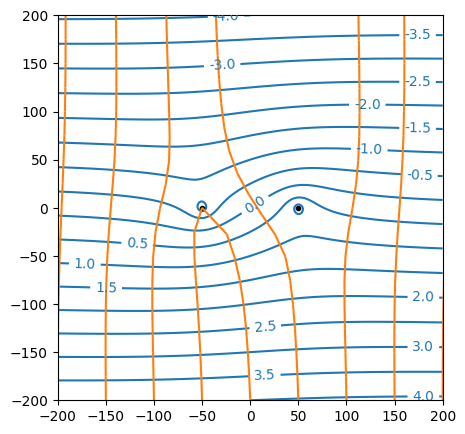

In [127]:
L = 200
model.plots.contour(
    win=[-L, L, -L, L],            # window to contour [xmin, xmax, ymin, ymax]
    ngr=200,                       # number of points where to compute the head
    levels=np.arange(-5, 5, 0.5),  # levels to be contoured
    labels=True,                   # add labels along the contours
    decimals=1,                    # print labels with 1 decimal place
    legend=False,                  # don't add a legend
    figsize=(5, 5),                # specify a figure size of 5 by 5 inches
);

xstart = np.arange(-L, L+1, 50)
ystart = -L * np.ones(len(xstart))
zstart = np.zeros(len(xstart))
model.plots.tracelines(
    xstart=xstart,    # x-locations of starting points
    ystart=ystart,    # y-locations of starting points
    zstart=zstart,    # z-locations of starting points
    hstepmax=25,      # maximum horizontal step size
    color="C1",       # color of lines
);